In [42]:
import geopandas as gpd 
import fiona 
import numpy as np
import pandas as pd 

In [43]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf_wards = gpd.read_file('data/jaipur_nagar_nigam_wards_2024.kml',driver='KML')
gdf_heritage = gpd.read_file('data/Nagar nigam Heritage.kml', driver='KML') 

# Filter for multi-polygons
gdf_heritage = gdf_heritage[gdf_heritage.geometry.type == 'MultiPolygon']
gdf_wards = gdf_wards[gdf_wards.geometry.type == 'MultiPolygon']

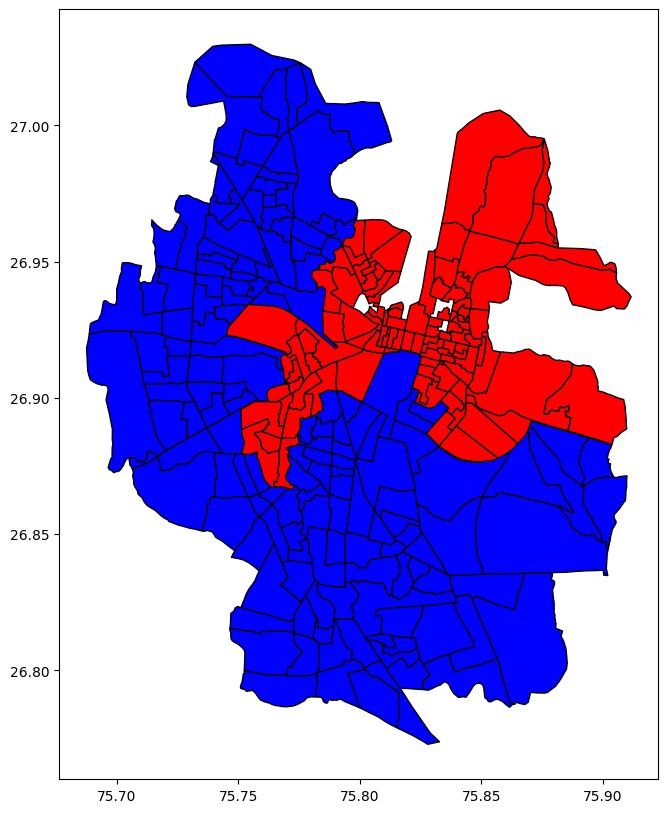

In [44]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1, figsize=(20, 10))
gdf_wards.plot(ax=ax, color='blue', edgecolor='black')
gdf_heritage.plot(ax=ax, color='red', edgecolor='black')
plt.show()

In [45]:
# Concat the two, keep geometry columns only
gdf = pd.concat([gdf_wards, gdf_heritage], ignore_index=True)
gdf = gdf[['geometry']]
gdf

,geometry
0,"MULTIPOLYGON (((75.87995 26.82512, 75.88000 26..."
1,"MULTIPOLYGON (((75.76040 26.91629, 75.76165 26..."
2,"MULTIPOLYGON (((75.71113 26.90479, 75.71119 26..."
3,"MULTIPOLYGON (((75.74905 26.87946, 75.74711 26..."
4,"MULTIPOLYGON (((75.74043 26.87994, 75.74002 26..."
...,...
239,"MULTIPOLYGON Z (((75.81792 26.96157 0.00000, 7..."
240,"MULTIPOLYGON Z (((75.87135 26.97141 0.00000, 7..."
241,"MULTIPOLYGON Z (((75.87731 26.97182 0.00000, 7..."
242,"MULTIPOLYGON Z (((75.87523 26.98938 0.00000, 7..."


In [46]:
gdf.to_file('../../public/data/mapMain/jaipur_wards.geojson', driver='GeoJSON')